<a href="https://colab.research.google.com/github/budhiacharya/AI-Lesson/blob/main/Assign_12_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 12: Neural Network and Deep Learning Basics

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [2]:
# Load CIFAR-10 dataset
# CIFAR-10: 60,000 32x32 colour images, 10 classes
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train_int), (X_test, y_test_int) = cifar10.load_data()

# y_* come as shape (n,1), flatten to (n,)
y_train_int = y_train_int.reshape(-1)
y_test_int = y_test_int.reshape(-1)

class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

print("Train shape:", X_train.shape, y_train_int.shape)
print("Test shape :", X_test.shape, y_test_int.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train shape: (50000, 32, 32, 3) (50000,)
Test shape : (10000, 32, 32, 3) (10000,)


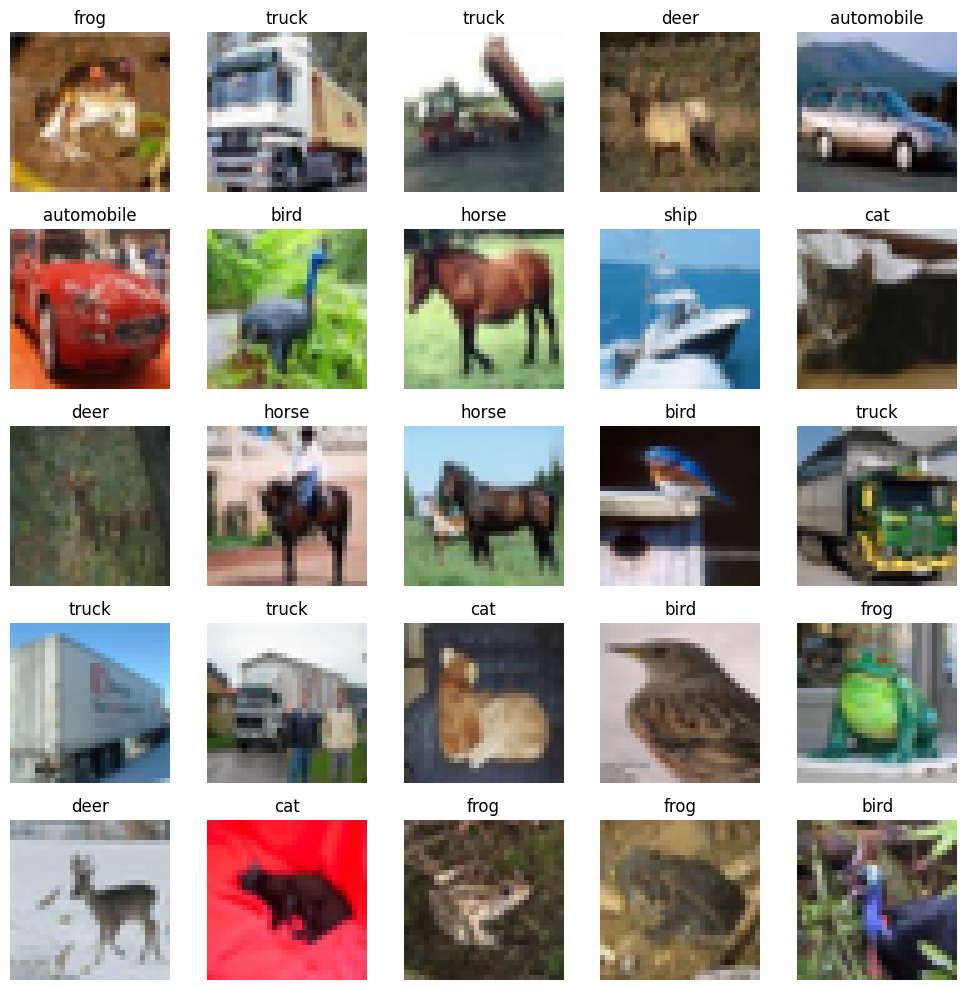

In [3]:
# Visualize some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train_int[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# 3. Preprocessing: Normalization
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert labels to one-hot encoding for categorical_crossentropy
y_train = to_categorical(y_train_int, num_classes=10)
y_test = to_categorical(y_test_int, num_classes=10)

In [5]:
# Data Augmentation
augment = True
if augment:
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(X_train)
    train_data = datagen.flow(X_train, y_train, batch_size=32)
    steps_per_epoch = X_train.shape[0] // 32
else:
    train_data = (X_train, y_train)
    steps_per_epoch = None  # Keras will infer

In [6]:
# Build a simple feedforward neural network
# (Flatten -> Dense -> Dense -> Output)
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),      # CIFAR-10 images are 32x32x3
    layers.Flatten(),                     # Flatten to 1D
    layers.Dense(256, activation='relu'), # Hidden layer 1
    layers.Dense(128, activation='relu'), # Hidden layer 2
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 5. Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # because we used to_categorical()
    metrics=['accuracy']
)

In [8]:
# 6. Train the model
EPOCHS = 15
BATCH_SIZE = 32

if augment:
    history = model.fit(
        train_data,
        epochs=EPOCHS,
        steps_per_epoch=steps_per_epoch,
        validation_data=(X_test, y_test),  # using test as validation just for demo
        verbose=1
    )
else:
    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.2,
        verbose=1
    )

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 51s 31ms/step - accuracy: 0.2639 - loss: 2.0458 - val_accuracy: 0.3748 - val_loss: 1.7384
Epoch 2/15
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4375 - loss: 1.5318

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.4375 - loss: 1.5318 - val_accuracy: 0.3699 - val_loss: 1.7624
Epoch 3/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3553 - loss: 1.7982 - val_accuracy: 0.4174 - val_loss: 1.6404
Epoch 4/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 619us/step - accuracy: 0.4062 - loss: 1.6529 - val_accuracy: 0.4149 - val_loss: 1.6421
Epoch 5/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3782 - loss: 1.7209 - val_accuracy: 0.4318 - val_loss: 1.5870
Epoch 6/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.3438 - loss: 1.5916 - val_accuracy: 0.4299 - val_loss: 1.5841
Epoch 7/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.3968 - loss: 1.6685 - val_accuracy: 0.4298 - val_loss: 1.5828
Epoch 8/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.4062 - loss: 1.7005 - val_accuracy: 0.4359 - val_loss: 1.5734
Epoch 9/15
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.4059 - loss: 1.65

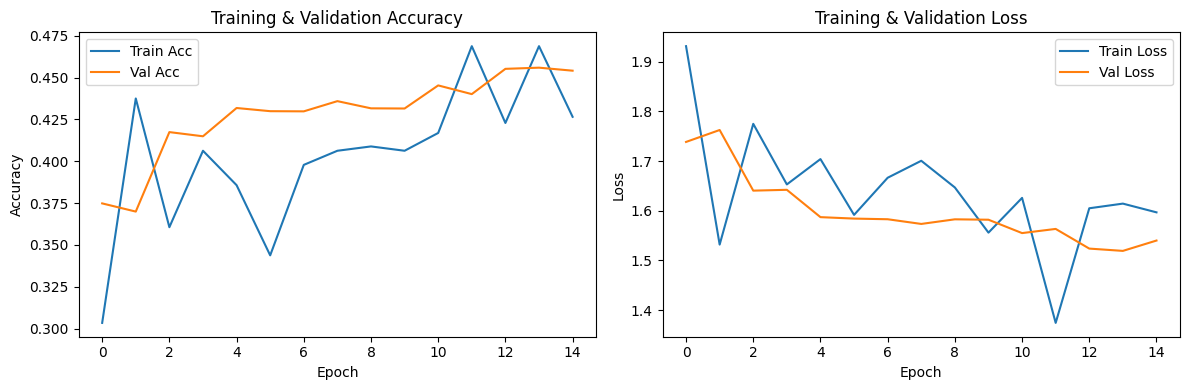

In [9]:

# Plot training & validation accuracy/loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss    : {test_loss:.4f}")

Test Accuracy: 0.4541
Test Loss    : 1.5400


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


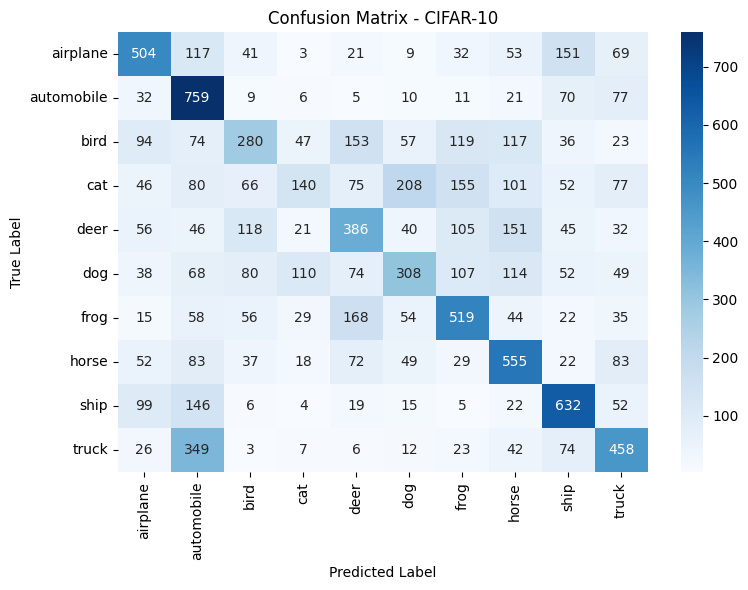


Classification Report:
              precision    recall  f1-score   support

    airplane       0.52      0.50      0.51      1000
  automobile       0.43      0.76      0.55      1000
        bird       0.40      0.28      0.33      1000
         cat       0.36      0.14      0.20      1000
        deer       0.39      0.39      0.39      1000
         dog       0.40      0.31      0.35      1000
        frog       0.47      0.52      0.49      1000
       horse       0.45      0.56      0.50      1000
        ship       0.55      0.63      0.59      1000
       truck       0.48      0.46      0.47      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



In [11]:
# Predictions, Confusion Matrix and Classification Report
y_pred_proba = model.predict(X_test)
y_pred_int = np.argmax(y_pred_proba, axis=1)

cm = confusion_matrix(y_test_int, y_pred_int)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - CIFAR-10")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_int, y_pred_int, target_names=class_names))